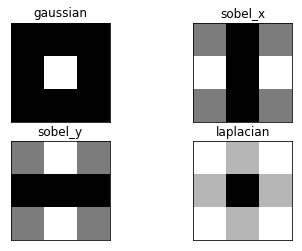

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')
%matplotlib inline

# Define gaussian, sobel, and Laplacian (edge) filters

gaussian = (1/9) * np.array([[1, 1, 1],
                             [1, 1, 1],
                             [1, 1, 1]])

sobel_x =np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# laplacian, edge filter
laplacian = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]

filter_name = ['gaussian','sobel_x', 'sobel_y', 'laplacian']

# perform a fft on each filter
# and create a scald, frequency transform image

f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z) + 1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image.

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (all edge, regardless of orientation) filter, should block out low-frequencies!

You are encouraged to load in an image, apply a filter to it using `filter2d` then visualize what the fourier transform of that image looks like before and after a filter is applied.


## TODO: load in an image, and filter it using a kernel of your choice
## apply a fourier transform to the original *and* filtered images and compare them

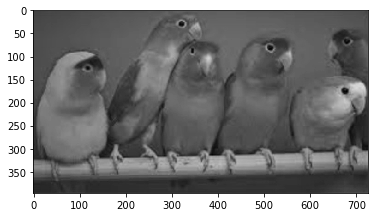

In [2]:
# TODO: load in an image
img = cv2.imread('data/images/birds.jpg')

# Convert to grayscale for filtering
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

# filter it using a kernel of your choice
filtered_imgs = [cv2.filter2D(gray, -1, filter) for filter in filters]

In [3]:
def ft_image(image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''

    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))

    return frequency_tx

In [4]:
f_birds = ft_image(gray)
f_filtered_imgs = [ft_image(filtered_img) for filtered_img in filtered_imgs]

-1
-1
-1
-1


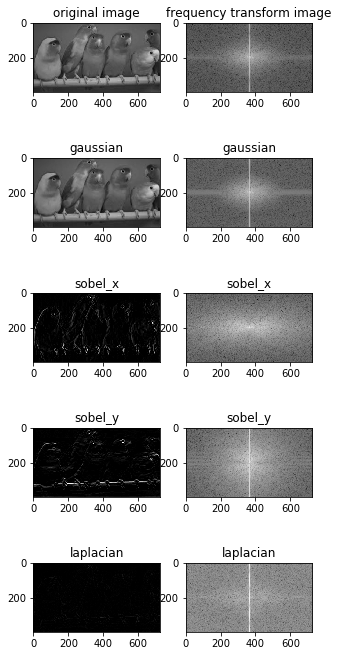

In [6]:
f, ax = plt.subplots(len(f_filtered_imgs) + 1, 2, figsize=(5,12))
ax[0, 0].set_title('original image')
ax[0, 0].imshow(gray, cmap='gray')
ax[0, 1].set_title('frequency transform image')
ax[0, 1].imshow(f_birds, cmap='gray')

for i in range(1, len(f_filtered_imgs) + 1):
    for j in range(2):
        if j % 2 == 0:
            ax[i, j].set_title(filter_name[i-1])
            print(j-1)
            ax[i, j].imshow(filtered_imgs[i-1], cmap='gray')
        else:
            ax[i, j].set_title(filter_name[i-1])
            ax[i, j].imshow(f_filtered_imgs[i-1], cmap='gray')